# 로지스틱 회귀

전형적인 Binary classification algorithm 으로 결과값이 이진변수.

In [1]:
from IPython.display import Image

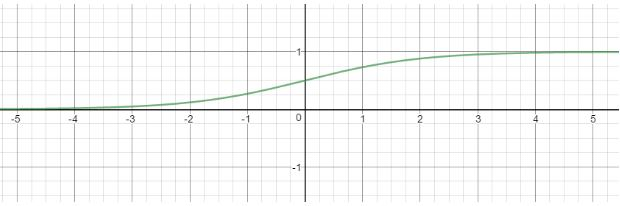

In [2]:
Image("시그모이드 함수.jpg")

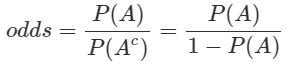

In [3]:
Image("odds.jpg")

승산(Odds)은 임의의 사건 A가 발생하지 않을 확률 대비 일어날 확률의 비율을 뜻하는 개념입니다. 

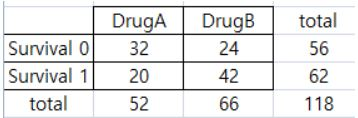

In [4]:
Image("drug.jpg")

Odds(A) 구하는 법

P(A,A에 대해 생존확률) = 20/52 = 0.38

1-P(A,사망확률) = 1-0.38 = 0.62

Odds(A) = 사망에 비해 생존할 확률의 비율 = 0.38/0.62 = 0.61

A약을 복용 시, 100명이 사망할 동안 61명이 생존한다.

Odds(B) 구하는 법

P(B, B에 대해 생존확률) = 24/66 = 0.63

1-P(B,사망확률) = 1-0.63 = 0.37

Odds(B) = 0.63/0.37 = 1.7

B약을 복용 시, 100명이 사망할 동안,170명이 생존한다.

Odds ratio 해석 =>

B에 대한 A의 Odds ratio = 0.61 / 1.7 = 0.36

* B에 비해 A일 때, 생존이 0.36배이다. = 64%가 생존율이 떨어진다고 할 수 있다.

odds ratio 는 계수들에 대해서 비선형이기때문에 선형으로 변환하기 위해 자연로그를 취해야 합니다.(로짓 변환)

logit(p) = log(p/1-p)

In [13]:
from sklearn.datasets import load_iris
import statsmodels.api as sm 
import numpy as np
import matplotlib.pyplot as plt 
iris = load_iris()
idx = np.in1d(iris.target, [0, 1]) # setoda=0, versicolor=1
X0 = iris.data[idx, :1] # 꽃 받침 길이만
X = sm.add_constant(X0) # 상수항 추가
y = iris.target[idx] 

logit_mod = sm.Logit(y, X) #베르누이를 분포를 따르는 로지스틱 회귀 모형
logit_res = logit_mod.fit(disp=0) # 종속변수와 독립변수 데이터를 넣어 모형을 만들고 fit메서드로 학습
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Sat, 16 May 2020   Pseudo R-squ.:                  0.5368
Time:                        17:59:55   Log-Likelihood:                -32.106
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 6.320e-18
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -27.8315      5.434     -5.122      0.000     -38.481     -17.182
x1             5.1403      1.007      5.107      0.000       3.168       7.113


In [14]:
X[:,1].max() # 4.3 7

7.0

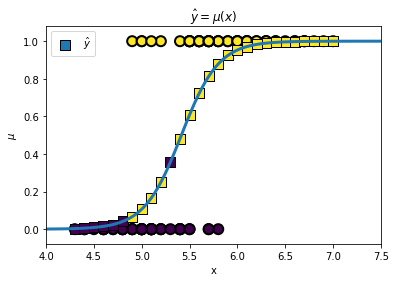

In [15]:
xx = np.linspace(4, 7.5, 100)
mu = logit_res.predict(sm.add_constant(xx))
plt.plot(xx, mu, lw=3)
plt.scatter(X0, y, c=y, s=100, edgecolor="k", lw=2)
plt.scatter(X0, logit_res.predict(X), label=r"$\hat{y}$", marker='s', c=y,
            s=100, edgecolor="k", lw=1)
plt.xlim(4, 7.5)
plt.xlabel("x")
plt.ylabel(r"$\mu$")
plt.title(r"$\hat{y} = \mu(x)$")
plt.legend()
plt.show()

# ROC 커브


ROC(Receiver Operator Characteristic) 커브는 클래스 판별 기준값의 변화에 따른 위양성률(fall-out)과 재현율(recall)의 변화를 시각화한 것이다.



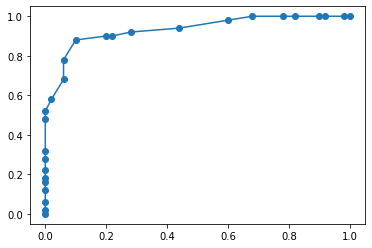

In [16]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, logit_res.fittedvalues)

plt.plot(fpr, tpr, 'o-')
plt.show()